MODELO TREINADO - BREAST CANCER IA

Para o arquivo do modelo treinado ser salvo na versão mais recente do scikit-learn, a célula a seguir deve ser executada:

In [ ]:
pip install scikit-learn==1.3.2


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 21.4 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


Para realizar o carregamento da base de dados (análise exploratória), a célula a seguir deve ser executada:

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.utils import resample
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report

#----------------------------ADIÇÕES----#
from sklearn.preprocessing import StandardScaler
import sklearn
import matplotlib.gridspec as gridspec
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import accuracy_score
from sklearn import metrics
import joblib

#Carregamento da base de dados

cancer = pd.read_csv('breast_cancer_modificado.csv')

In [ ]:
X = cancer.iloc[:, 0:32]

y = X[['target', 'class']]

#y.head(200)
X.head()

,x.radius_mean,x.texture_mean,x.perimeter_mean,x.area_mean,x.smoothness_mean,x.compactness_mean,x.concavity_mean,x.concave_pts_mean,x.symmetry_mean,x.fractal_dim_mean,...,x.perimeter_worst,x.area_worst,x.smoothness_worst,x.compactness_worst,x.concavity_worst,x.concave_pts_worst,x.symmetry_worst,x.fractal_dim_worst,class,target
0,14.060,17.18,89.75,609.1,0.08045,0.05361,0.026810,0.03251,0.1641,0.05764,...,96.42,684.5,0.10660,0.12310,0.08460,0.07911,0.2523,0.06609,B,1
1,9.777,16.99,62.50,290.2,0.10370,0.08404,0.043340,0.01778,0.1584,0.07065,...,71.68,367.0,0.14670,0.17650,0.13000,0.05334,0.2533,0.08468,B,1
2,13.900,19.24,88.73,602.9,0.07991,0.05326,0.029950,0.02070,0.1579,0.05594,...,104.40,830.5,0.10640,0.14150,0.16730,0.08150,0.2356,0.07603,B,1
3,12.460,12.83,78.83,477.3,0.07372,0.04043,0.007173,0.01149,0.1613,0.06013,...,83.24,534.0,0.09439,0.06477,0.01674,0.02680,0.2280,0.07028,B,1
4,11.710,16.67,74.72,423.6,0.10510,0.06095,0.035920,0.02600,0.1339,0.05945,...,86.16,546.7,0.12710,0.10280,0.10460,0.06968,0.1712,0.07343,B,1


In [ ]:
#DataFrame retornando apenas dados da classe maligno para testes
M = X[X['class'] == 'M']
M.head(100)

,x.radius_mean,x.texture_mean,x.perimeter_mean,x.area_mean,x.smoothness_mean,x.compactness_mean,x.concavity_mean,x.concave_pts_mean,x.symmetry_mean,x.fractal_dim_mean,...,x.perimeter_worst,x.area_worst,x.smoothness_worst,x.compactness_worst,x.concavity_worst,x.concave_pts_worst,x.symmetry_worst,x.fractal_dim_worst,class,target
201,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,M,0
202,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,M,0
203,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,M,0
204,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,M,0
205,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,M,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,20.58,22.14,134.70,1290.0,0.09090,0.13480,0.16400,0.09561,0.1765,0.05024,...,158.30,1656.0,0.1178,0.2920,0.3861,0.1920,0.2909,0.05865,M,0
297,14.19,23.81,92.87,610.7,0.09463,0.13060,0.11150,0.06462,0.2235,0.06433,...,115.00,811.3,0.1559,0.4059,0.3744,0.1772,0.4724,0.10260,M,0
298,13.86,16.93,90.96,578.9,0.10260,0.15170,0.09901,0.05602,0.2106,0.06916,...,104.40,750.1,0.1460,0.4370,0.4636,0.1654,0.3630,0.10590,M,0
299,19.53,32.47,128.00,1223.0,0.08420,0.11300,0.11450,0.06637,0.1428,0.05313,...,180.20,2477.0,0.1408,0.4097,0.3995,0.1625,0.2713,0.07568,M,0


Análise para identificação de valores únicos. Na situação a seguir, não é necessária a exclusão de nenhuma coluna uma vez que todas possuem mais de um valor único:

In [ ]:

valores_unicos = []
for i in cancer.columns[0:32].tolist():
    print(i, ':', (len(cancer[i].astype(str).value_counts())))
    valores_unicos.append(len(cancer[i].astype(str).value_counts()))


x.radius_mean : 324
x.texture_mean : 332
x.perimeter_mean : 349
x.area_mean : 363
x.smoothness_mean : 332
x.compactness_mean : 362
x.concavity_mean : 359
x.concave_pts_mean : 362
x.symmetry_mean : 301
x.fractal_dim_mean : 350
x.radius_se : 362
x.texture_se : 348
x.perimeter_se : 358
x.area_se : 358
x.smoothness_se : 367
x.compactness_se : 363
x.concavity_se : 354
x.concave_pts_se : 347
x.symmetry_se : 342
x.fractal_dim_se : 361
x.radius_worst : 324
x.texture_worst : 352
x.perimeter_worst : 349
x.area_worst : 362
x.smoothness_worst : 301
x.compactness_worst : 361
x.concavity_worst : 356
x.concave_pts_worst : 337
x.symmetry_worst : 347
x.fractal_dim_worst : 364
class : 2
target : 2


Divide o DataFrame em duas bases(Maligno e Benigno) para serem analisadas:

In [ ]:
descricao =list(X.columns[0:10])



XM=X[X['target'] == 0]
XB=X[X['target'] == 1]

Análise dos histogramas:

As médias dos valores de radius, perimeter, area, compactness, concavity and concave points podem ser usadas na classificação do câncer. Valores maiores desses parâmetros tendem a mostrar uma correlação com tumores malignos.

As médias dos valores de  texture, smoothness, symmetry or fractual dimension não demonstram uma preferência particular por um diagnóstico em relação ao outro. Em nenhum dos histogramas, há notáveis valores discrepantes (outliers) significativos que justifiquem uma limpeza adicional.


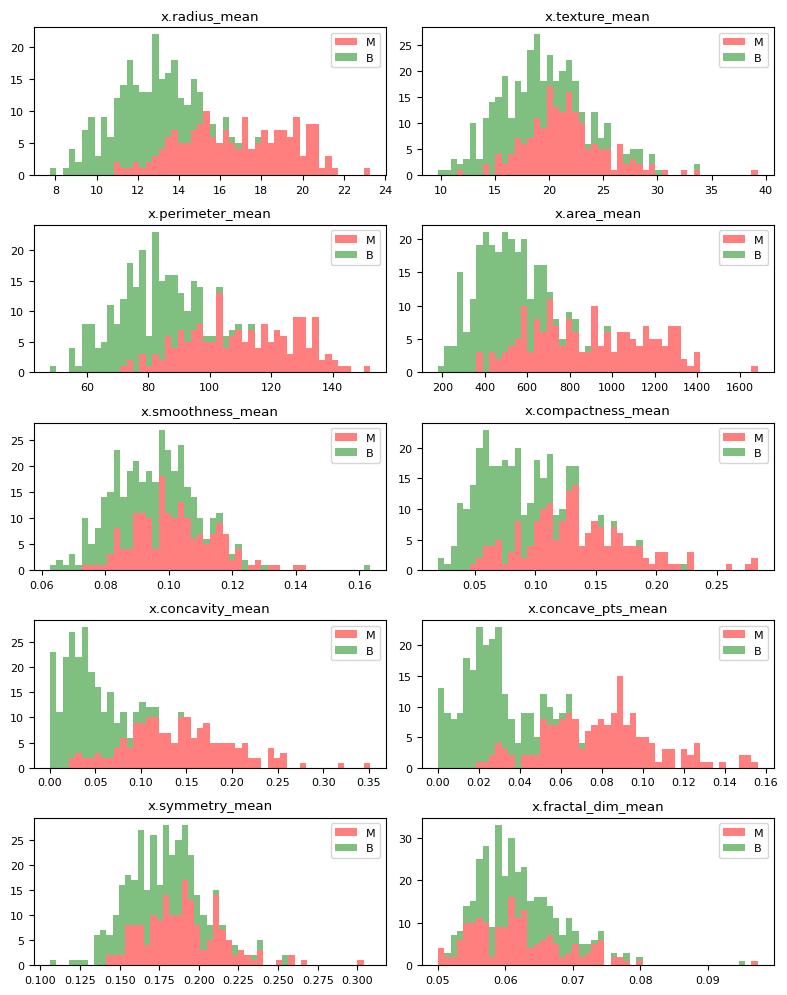

In [ ]:
plt.rcParams.update({'font.size': 8})
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(8,10))
axes = axes.ravel()
for i, ax in enumerate(axes):

    ax.figure
    tamanho= (max(X[descricao[i]]) - min(X[descricao[i]]))/50
    ax.hist([XM[descricao[i]],XB[descricao[i]]],
    bins= np.arange(min(X[descricao[i]]), max(X[descricao[i]]) + tamanho, tamanho), alpha=0.5, stacked=True,
    label=['M','B'], color=['r','g'])
    ax.legend(loc='upper right')
    ax.set_title(descricao[i])

plt.tight_layout()
plt.show()

In [ ]:
#CRIANDO UM TESTE E TREINADO, E TAMBEM HÁ UMA DIVISÃO DO DATAFRAME
treinoX, testeX = train_test_split(X, test_size = 0.2, random_state = 45)


In [ ]:
def classificacao(modelo, data, previsoes, alvo):

  # Ajusta o modelo:
  modelo.fit(data[previsoes], data[alvo])

  # Faz previsões no conjunto de treinamento:
  previ = modelo.predict(data[previsoes])

  # Imprime a precisão
  accuracy = metrics.accuracy_score(previ, data[alvo])
  print("Acurácia : %s" % "{0:.3%}".format(accuracy))

  # Realiza validação cruzada k-fold com 5 dobras
  kf = KFold(n_splits=5)
  erro = []
  for treino, teste in kf.split(data):
    # Filtra os dados de treinamento
    treinar_preditor = (data[previsoes].iloc[treino, :])

    # O alvo que estamos usando para treinar o algoritmo.
    treinar_target = data[alvo].iloc[treino]

    # Treinando o algoritmo usando os recursos e o alvo.
    modelo.fit(treinar_preditor, treinar_target)

    # Registra o erro de cada execução de validação cruzada
    erro.append(modelo.score(data[previsoes].iloc[teste, :], data[alvo].iloc[teste]))

    print("Pontuação de Validação Cruzada : %s" % "{0:.3%}".format(np.mean(erro)))

  # Ajusta o modelo novamente para que ele possa ser referenciado fora da função:
  modelo.fit(data[previsoes], data[alvo])



Na célula a seguir, verifica-se qual é o melhor modelo para nosso projeto. Com base nessa análise, árvore de decisão e rede neural são as melhores. Entretanto, escolhemos árvore de decisão pois é utilizada para problemas mais simples e nossa base de dados não é tão complexa. Além disso, a rede neural demora mais para ser treinada e consome mais recurso computacional em relação à árvore de decisão.

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


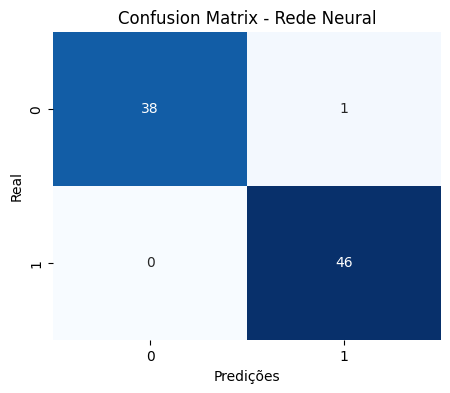

Resultados para - Rede Neural:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99        39
           1       0.98      1.00      0.99        46

    accuracy                           0.99        85
   macro avg       0.99      0.99      0.99        85
weighted avg       0.99      0.99      0.99        85




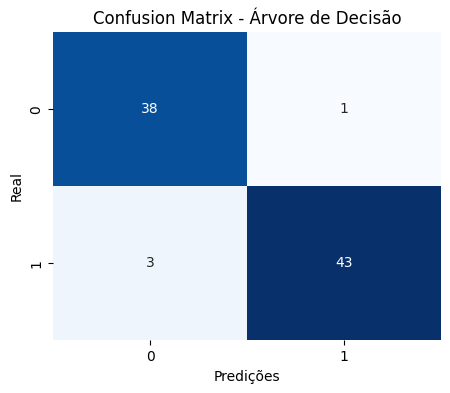

Resultados para - Árvore de Decisão:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95        39
           1       0.98      0.93      0.96        46

    accuracy                           0.95        85
   macro avg       0.95      0.95      0.95        85
weighted avg       0.95      0.95      0.95        85




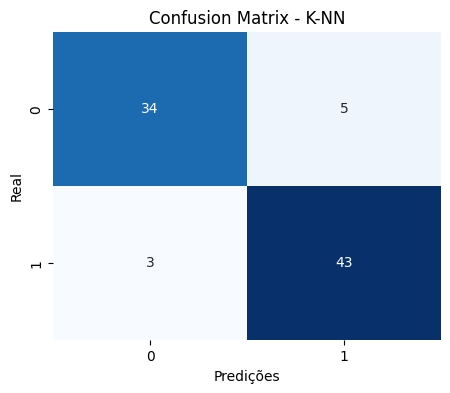

Resultados para - K-NN:
              precision    recall  f1-score   support

           0       0.92      0.87      0.89        39
           1       0.90      0.93      0.91        46

    accuracy                           0.91        85
   macro avg       0.91      0.90      0.90        85
weighted avg       0.91      0.91      0.91        85




/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


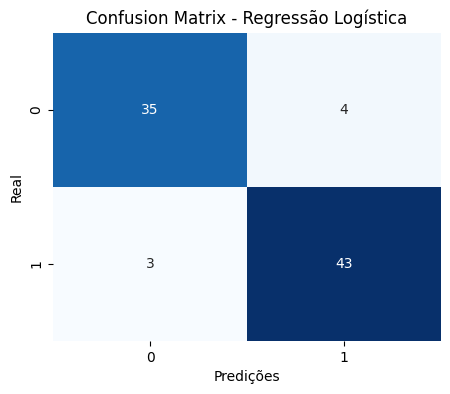

Resultados para - Regressão Logística:
              precision    recall  f1-score   support

           0       0.92      0.90      0.91        39
           1       0.91      0.93      0.92        46

    accuracy                           0.92        85
   macro avg       0.92      0.92      0.92        85
weighted avg       0.92      0.92      0.92        85




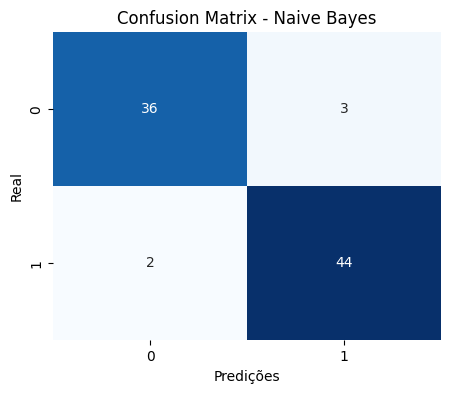

Resultados para - Naive Bayes:
              precision    recall  f1-score   support

           0       0.95      0.92      0.94        39
           1       0.94      0.96      0.95        46

    accuracy                           0.94        85
   macro avg       0.94      0.94      0.94        85
weighted avg       0.94      0.94      0.94        85



Previsões para a nova amostra:
Rede Neural: Classe 1, Certeza: 97.32%
Árvore de Decisão: Classe 1, Certeza: 100.00%
K-NN: Classe 1, Certeza: 100.00%
Regressão Logística: Classe 1, Certeza: 99.80%
Naive Bayes: Classe 1, Certeza: 100.00%


In [ ]:

# Carregando os dados
df = pd.read_csv('breast_cancer_modificado.csv')

# Dividindo os dados em features e target
X = df.drop(['target', 'class'], axis=1)
y = df['target']

# Dividindo os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinando os modelos
mlp = MLPClassifier(random_state=42)
tree = DecisionTreeClassifier(random_state=42)
knn = KNeighborsClassifier()
logistic = LogisticRegression(random_state=42)
nb = GaussianNB()

classifiers = [mlp, tree, knn, logistic, nb]
classifier_names = ["Rede Neural", "Árvore de Decisão", "K-NN", "Regressão Logística", "Naive Bayes"]

# Armazenar as previsões para uma nova amostra
new_sample = X_test.iloc[0:1]  # Usando a primeira amostra do conjunto de teste como exemplo

predictions = {}

# Avaliando e plotando as matrizes de confusão e classification reports
for clf, clf_name in zip(classifiers, classifier_names):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f'Confusion Matrix - {clf_name}')
    plt.xlabel('Predições')
    plt.ylabel('Real')
    plt.show()

    report = classification_report(y_test, y_pred)
    print(f'Resultados para - {clf_name}:\n{report}\n{"="*50}\n')

    # Fazendo previsões para a nova amostra
    prediction = clf.predict(new_sample)
    probability = clf.predict_proba(new_sample).max()
    predictions[clf_name] = {'prediction': prediction[0], 'probability': probability}

# Imprimindo as previsões para a nova amostra
print("\nPrevisões para a nova amostra:")
for clf_name, result in predictions.items():
    print(f"{clf_name}: Classe {result['prediction']}, Certeza: {result['probability'] * 100:.2f}%")


Modelo de Regressão Logística:

A regressão logística é amplamente usada para a classificação de dados discretos. Neste caso, a utilizaremos para classificação binária (1,0).

Com base nas observações nos gráficos de histograma, podemos supor que o diagnóstico do câncer depende das médias do radius, mean perimeter, mean area, mean compactness, mean concavity and mean concave points. Podemos, então, realizar uma análise de regressão logística usando essas características da seguinte maneira:

In [ ]:
previsao = ['x.radius_mean','x.perimeter_mean','x.area_mean','x.compactness_mean','x.concave_pts_mean']
alvos='target'
modelo=LogisticRegression(max_iter = 200)

classificacao(modelo,treinoX,previsao,alvos)

Acurácia : 89.676%
Pontuação de Validação Cruzada : 88.235%
Pontuação de Validação Cruzada : 88.971%
Pontuação de Validação Cruzada : 88.725%
Pontuação de Validação Cruzada : 88.603%
Pontuação de Validação Cruzada : 88.793%


Arvore de decisão:

In [ ]:
previsao = ['x.radius_mean','x.perimeter_mean','x.area_mean','x.compactness_mean','x.concave_pts_mean']
alvos='target'
modelo=DecisionTreeClassifier()

classificacao(modelo,testeX,previsao,alvos)

Acurácia : 100.000%
Pontuação de Validação Cruzada : 96.154%
Pontuação de Validação Cruzada : 98.077%
Pontuação de Validação Cruzada : 92.308%
Pontuação de Validação Cruzada : 91.231%
Pontuação de Validação Cruzada : 90.585%


Usando todas as colunas, precebe-se que a precisão e a validação cruzada são otimas:

In [ ]:
#USANDO TODAS AS COLUNAS
previsao = descricao
modelo = RandomForestClassifier(n_estimators=100,min_samples_split=25, max_depth=7, max_features=2)
classificacao(modelo,testeX,previsao,alvos)

Acurácia : 95.882%
Pontuação de Validação Cruzada : 94.118%
Pontuação de Validação Cruzada : 94.118%
Pontuação de Validação Cruzada : 93.137%
Pontuação de Validação Cruzada : 92.647%
Pontuação de Validação Cruzada : 92.353%


Aqui,  uma matriz com dados da importância das colunas é retornada. Portanto, vamos selecionar as cinco principais colunas e usá-las para na previsão.


In [ ]:
featImp = pd.Series(modelo.feature_importances_, index=previsao).sort_values(ascending=False)
print(featImp)

x.concave_pts_mean    0.258700
x.concavity_mean      0.173121
x.area_mean           0.153087
x.perimeter_mean      0.123804
x.compactness_mean    0.112537
x.radius_mean         0.086687
x.smoothness_mean     0.033770
x.texture_mean        0.030477
x.fractal_dim_mean    0.014710
x.symmetry_mean       0.013107
dtype: float64


A seguir, o gráfico explica melhor a sitação anterior. As colunas x.concave_pts_mean, x.concavity_mean e x.area_mean, por exemplo, se mostram mais interessantes para serem levadas em consideração na nossa análise.        


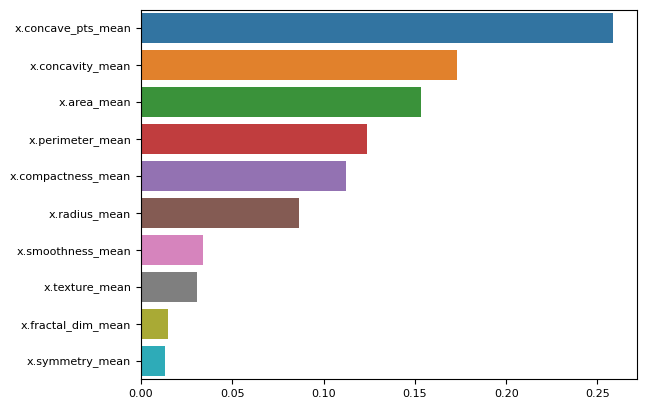

In [ ]:
importancia = pd.Series(modelo.feature_importances_, index=previsao).sort_values(ascending=False)
sns.barplot(x=importancia, y = importancia.index)
plt.show()

O uso das cinco melhores colunas altera um pouco a precisão da previsão:

In [ ]:
#Usando as 5 colunas
previsao = ['x.concave_pts_mean','x.area_mean','x.radius_mean','x.perimeter_mean','x.concavity_mean']
modelo = RandomForestClassifier(n_estimators=100,min_samples_split=25, max_depth=7, max_features=2)
classificacao(modelo,testeX,previsao,alvos)

Acurácia : 94.706%
Pontuação de Validação Cruzada : 94.118%
Pontuação de Validação Cruzada : 94.118%
Pontuação de Validação Cruzada : 92.157%
Pontuação de Validação Cruzada : 91.176%
Pontuação de Validação Cruzada : 91.765%


In [ ]:
descricao2 =list(X.columns[0:30])

# Divide o DataFrame usando todas as colunas em duas bases(Maligno e Benigno) para serem analisadas

XM=X[X['target'] == 0]
XB=X[X['target'] == 1]

In [ ]:
previsao = descricao2
modelo = RandomForestClassifier(n_estimators=100,min_samples_split=25, max_depth=7, max_features=2)
classificacao(modelo,testeX,previsao,alvos)

NameError: ignored

A precisão indica que o modelo é capaz de fazer previsões corretas em aproximadamente 97.647% dos casos.

A pontuação de validação cruzada é uma métrica importante que reflete o desempenho do modelo em diferentes subconjuntos dos dados. As pontuações de validação cruzada variam de 91% a 94%, o que é um bom sinal. Essas pontuações sugerem que o modelo está se saindo bem em diferentes partições dos dados e é capaz de generalizar bem para novos dados.

É importante lembrar que, embora uma alta precisão seja desejável, é essencial considerar outras métricas, dependendo do contexto problema. Além disso, temos que nos certificar se não está acontecento um over-fitting com os dados e que as métricas são consistentes em diferentes conjuntos de dados. A validação cruzada ajuda a avaliar a estabilidade do modelo.


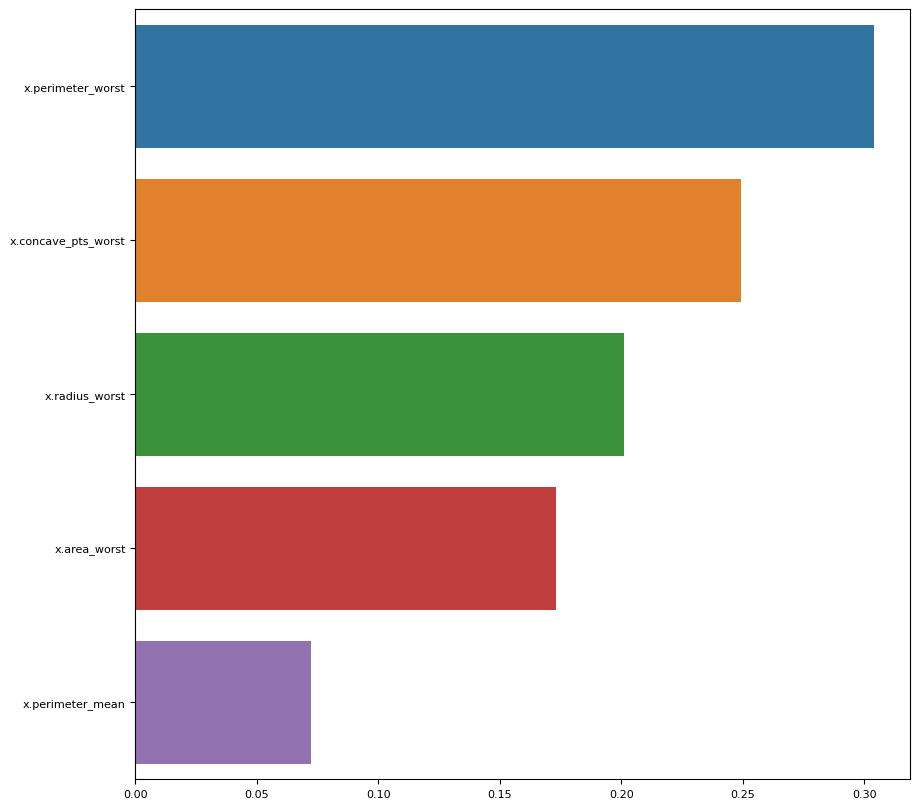

In [ ]:
plt.rcParams['figure.figsize']=[10.00, 10.00]
importancia = pd.Series(modelo.feature_importances_, index=previsao).sort_values(ascending=False)
sns.barplot(x=importancia, y = importancia.index)
plt.show()

Continuação das validações para confirmar as melhores colunas baseadas no modelo random forest.

In [ ]:
#Usando as 5 colunas
previsao = ['x.radius_worst','x.concave_pts_worst','x.perimeter_worst','x.area_worst','x.perimeter_mean']
modelo = RandomForestClassifier(n_estimators=100,min_samples_split=25, max_depth=7, max_features=2)
classificacao(modelo,testeX,previsao,alvos)

Acurácia : 94.118%
Pontuação de Validação Cruzada : 94.118%
Pontuação de Validação Cruzada : 91.176%
Pontuação de Validação Cruzada : 90.196%
Pontuação de Validação Cruzada : 89.706%
Pontuação de Validação Cruzada : 90.588%


In [ ]:
previsao = ['x.concave_pts_mean','x.area_worst','x.radius_worst','x.perimeter_worst','x.concavity_mean']
modelo = RandomForestClassifier(n_estimators=100,min_samples_split=25, max_depth=7, max_features=2)
alvos='target'
classificacao(modelo,testeX,previsao,alvos)

Acurácia : 97.647%
Pontuação de Validação Cruzada : 94.118%
Pontuação de Validação Cruzada : 94.118%
Pontuação de Validação Cruzada : 94.118%
Pontuação de Validação Cruzada : 92.647%
Pontuação de Validação Cruzada : 92.941%


In [ ]:
previsao = ['x.radius_worst','x.concave_pts_worst','x.perimeter_worst','x.area_worst','x.concave_pts_mean']
modelo = RandomForestClassifier(n_estimators=100,min_samples_split=25, max_depth=7, max_features=2)
classificacao(modelo,testeX,previsao,alvos)


Acurácia : 98.824%
Pontuação de Validação Cruzada : 94.118%
Pontuação de Validação Cruzada : 91.176%
Pontuação de Validação Cruzada : 94.118%
Pontuação de Validação Cruzada : 92.647%
Pontuação de Validação Cruzada : 94.118%


Salvamento do modelo treinado:


In [ ]:
joblib.dump(modelo, "modeloTreinamento.pkl")

['modeloTreinamento.pkl']

-------------------------------------------

In [ ]:
modelo = joblib.load("modeloTreinamento.pkl")

Realização de teste para confirmação positiva dos resultados:

In [ ]:
#teste
def predict_sample(radius_worst,concave_pts_worst,perimeter_worst,area_worst,perimeter_mean):
    sample = np.array([[radius_worst,concave_pts_worst,perimeter_worst,area_worst,perimeter_mean]])
    predicted_class = modelo.predict(sample)[0]

    if predicted_class == 1:
        result = 'BENIGNO'
    else:
        result = 'MALIGNO'

    return result

In [ ]:
var = predict_sample(0.1504,0.079110, 96.42, 684.5 ,89.75)

print(var)

MALIGNO


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
for idx, model in enumerate(Algoritimos):
  alvos='target'
  classificacao(modelo,testeX, descricao2 ,alvos)
  results_df.loc[idx, 'Acuracia']

Acurácia : 100.000%
Pontuação de Validação Cruzada : 94.118%
Pontuação de Validação Cruzada : 91.176%
Pontuação de Validação Cruzada : 92.157%
Pontuação de Validação Cruzada : 91.176%
Pontuação de Validação Cruzada : 92.941%
Acurácia : 100.000%
Pontuação de Validação Cruzada : 94.118%
Pontuação de Validação Cruzada : 91.176%
Pontuação de Validação Cruzada : 92.157%
Pontuação de Validação Cruzada : 91.176%
Pontuação de Validação Cruzada : 92.941%
Acurácia : 100.000%
Pontuação de Validação Cruzada : 94.118%
Pontuação de Validação Cruzada : 91.176%
Pontuação de Validação Cruzada : 92.157%
Pontuação de Validação Cruzada : 91.176%
Pontuação de Validação Cruzada : 92.941%
